# Homework 3

Covers Lectures [9](../lectures/lec_09.ipynb), [10](../lectures/lec_10.ipynb), [11](../lectures/lec_11.ipynb), and [12](../lectures/lec_12.ipynb).

## The Mauna Loa CO2 data set
The National Oceanic and Atmospheric Administration (NOAA) has been measuring the levels of atmospheric CO2 at the Mauna Loa, Hawaii. The measurements start on March 1958 and go all the way to Janurary 2016.
The data can be found [here](http://www.esrl.noaa.gov/gmd/ccgg/trends/data.html).
The Python script below, downloads and plots the data set.

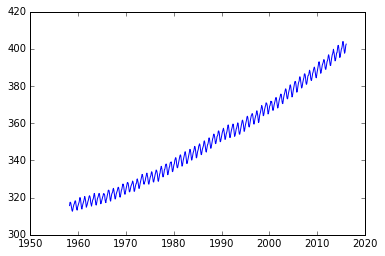

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# First download the data
import urllib
urllib.urlretrieve('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', '../data/co2_mm_mlo.txt')
# Now we load it
data = np.loadtxt('../data/co2_mm_mlo.txt')
# This is time (measured in decimal dates)
t = data[:, 2][:, None]
# This the the CO2 level (mole fraction in dry air, micromol/mol, abbreviated as ppm)
y = data[:, 4][:, None]
plt.plot(t, y)

Overall, we observe a steady growth of CO2 levels. The wiggles correspond to seasonal changes. Since the vast majority of the population inhabits the Northen hemisphere, fuel consumption goes up during the Northen winters. Our goal is to study this data set with the regression techniques we learned in class. Specifically we would like to provide an answer to the following task.
+ **Task 1** Predict the evolution of the CO2 levels from Feb 2016 to Feb 2026 (ten years from now).
+ **Task 2**  Quantify our uncertainty about this prediction.

## Problem 1 - Mauna Loa CO2 with Bayesian regression
In this problem you have to use one of the Bayesian regression methods we discussed in [lecture 9](../lectures/lec_09.ipynb). *Your goal is to learn the map between $t$ and $y$ and use it to answer the to Tasks 1 and 2 presented above*. We suggest that you use the Automatic Relevance Determination (ARD) Regression as implemented in [scikitlearn](http://scikit-learn.org/stable/index.html). This is the last one we saw in class. Which basis functions should you use and why? We suggest that you use ARD because it allows you to specify a large set of basis functions and let the model select some of them. The choice of the candidate basis functions is completely up to you, but we expect you to go beyond linear. Examples are: linear, sines and cosines, exponentials. We expect you to justify your choices and interpret your findings. E.g., "I picked these basis functions because I expected this to happen", or "ARD finally selected these basis functions and this can be interpreted as this and that." 

## Problem 2 - Mauna Load CO2 with Gaussian process regression
In this problem you have to do exactly the same as in problem 1, but using Gaussian process regression. Of course, feel free to use ``GPy``. It would be enough to replicate the results of the study presented in [Section 5.4.3](http://www.gaussianprocess.org/gpml/chapters/RW5.pdf) of the GP book. Can you do better? Hint: The independent noise component in ``GPy`` is the parameter ``model.likelihood.variance``. You do not have to put it in a covariance function. For your convenience, here is a list of ``GPy`` covariance functions that you could use: 

In [2]:
import GPy
for k in GPy.kern.__dict__.keys():
    if k[0] != '_':
        print k

Couldn't import dot_parser, loading of dot files will not be possible.
Matern52
Matern32
Cosine
PeriodicMatern52
White
ODE_t
DEtime
Linear
ODE_st
PeriodicExponential
EQ_ODE2
LinearSlopeBasisFuncKernel
StdPeriodic
ExpQuad
BasisFuncKernel
IndependentOutputs
DiffGenomeKern
Coregionalize
Exponential
RatQuad
SplitKern
Kern
MLP
TruncLinear
RBF
Fixed
TruncLinear_inf
ODE_UYC
Hierarchical
LinearFull
Brownian
Poly
PeriodicMatern32
ODE_UY
Bias
DomainKernel
OU
ChangePointBasisFuncKernel
Spline


You can look at what each one does by using the help function:

In [3]:
print help(GPy.kern.PeriodicExponential)

Help on class PeriodicExponential in module GPy.kern._src.periodic:

class PeriodicExponential(Periodic)
 |  Kernel of the periodic subspace (up to a given frequency) of a exponential
 |  (Matern 1/2) RKHS.
 |  
 |  Only defined for input_dim=1.
 |  
 |  Method resolution order:
 |      PeriodicExponential
 |      Periodic
 |      GPy.kern._src.kern.Kern
 |      GPy.core.parameterization.parameterized.Parameterized
 |      GPy.core.parameterization.parameter_core.Parameterizable
 |      GPy.core.parameterization.parameter_core.OptimizationHandlable
 |      GPy.core.parameterization.parameter_core.Indexable
 |      GPy.core.parameterization.parameter_core.Nameable
 |      GPy.core.parameterization.parameter_core.Gradcheckable
 |      GPy.core.parameterization.parameter_core.Pickleable
 |      GPy.core.parameterization.parameter_core.Parentable
 |      GPy.core.parameterization.updateable.Updateable
 |      GPy.core.parameterization.observable.Observable
 |      __builtin__.object
 |  
 

Feel free to **multiply** and **sum** existing covariance functions to create new ones. Now, this is not as easy as it sounds. The likelihood will have a lot (and I mean a lot!) local maxima. To find a good one, you must either start from intuitively plaussible hyper-parameters and then optimize the model or you must randomly restart the optimization from various initial hyper-parameter values. The latter can be done by ``model.optimize_restarts(num_restarts=100, robust=True)``, which will do 100 restarts of the likelihood optimization. This would take about an hour, so plan ahead. The picture we are looking for is something like this:

![foo](../lectures/figures/gp_co2.png)

## Problem 3 - Stochastic model for permeability of oil reservoir
The permeability of the soil is one of the largest unknowns in modeling underground flows. Here, you will create a 2D model of permeability that can be used for propagating uncertainties or as a starting point for model calibration. This is the information that is available to you:
+ You need to build a stochastic model for permeability with as low dimensionality as possible.
+ You need to be able to sample random permeability fields from this model.
+ The permeability is strictly positive.
+ The 2D domain you should consider is $[0, 356]\times[0,670]$ (in meters).
+ Our geologist gave us her best estimate about the permeability field. We have put the results for you in a data file and we show you how to load it and plot it below.
+ When asked how sure she is about the prediction, the geologist gave a standard deviation of about 3.2 on the logarithm of the permeability.
+ She also believes that there are two lengthscales: 50 meters and 10 meters.

Do the following:

a. Write down the mathematical form of the best stochastic model for the permeability you can come up with using the information above. Are you going to use a GP? Are you going to consider a transformed version of the GP? What would the mean be? What would the covariance function be? What would the parameters of the covariance function be?

b. Construct the Karhunen-Loeve expansion of the field using the code provided in [lecture 12](../lectures/lec_12.ipynb). You should: 1) use enough quadrature points so that you get a converged Nystrom approximation; 2) use enough terms to cover $95\%$ of the fields energy; 3) Plot the egenvalues of KLE; 4) Plot the first six eigenfunctions of KLE; 5) Plot six samples of the random field.

c. You sent a crew to go and make some measurements of the permeability. Repeate everything you did in b. making use of the new data:
 

|$x_1$ |$x_2$ | $\log K(x_1, x_2)$ |
|------|------|--------------------|
|100.  |200.  | -13.2              |
|300.  |500.  | -25.3              |
 
Here is the mean field provided by the geologist:

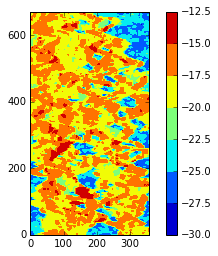

In [4]:
K = np.loadtxt('../data/spe10_permx.dat')
x1 = np.linspace(0, 356, 60)
x2 = np.linspace(0, 670, 220)
X1, X2 = np.meshgrid(x1, x2)
fig, ax = plt.subplots()
c = plt.contourf(X1, X2, np.log(K).T)
ax.set_aspect(1.)
ax.locator_params(nbins=4)
plt.colorbar(c);